In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_pb = pd.read_csv('purchase_behaviour.csv')
df_pb.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [3]:
df_pb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [4]:
df_pb.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

========================================================================================================================

In [5]:
df_td = pd.read_excel('transaction_data.xlsx')
df_td.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [6]:
df_td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [7]:
df_td.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [8]:
df_td=df_td[~df_td.duplicated()]

In [9]:
df_td.duplicated().sum()

0

### Date Column

In [10]:
df_td['DATE'] = pd.to_datetime(df_td["DATE"], origin='1899-12-30', unit='D')

In [11]:
df_td.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [12]:
df_td['PROD_WT']=df_td.PROD_NAME.str.extract(r'(\d+)')

In [13]:
df_td["PROD_NAME"]=df_td.PROD_NAME.str[:-4]

In [14]:
df_td.PROD_NAME = df_td.PROD_NAME.str.replace('&','')

In [15]:
df_td.PROD_NAME = df_td.PROD_NAME.str.replace('  ',' ')

In [16]:
 df_td = df_td[~df_td.PROD_NAME.str.contains('Salsa')]

In [17]:
df_td.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
PROD_WT           0
dtype: int64

In [18]:
df_td.PROD_NAME[:50]

0           Natural Chip    Compny SeaSalt
1                       CCs Nacho Cheese  
2        Smiths Crinkle Cut Chips Chicken 
3         Smiths Chip Thinly S/CreamOnion 
4      Kettle Tortilla ChpsHnyJlpno Chili 
6       Smiths Crinkle Chips Salt Vinegar 
7            Grain Waves     Sweet Chilli 
8      Doritos Corn Chip Mexican Jalapeno 
9           Grain Waves Sour  CreamChives 
10      Smiths Crinkle Chips Salt Vinegar 
11        Kettle Sensations  Siracha Lime 
12                      Twisties Cheese   
13               WW Crinkle Cut   Chicken 
14                Thins Chips Light Tangy 
15                           CCs Original 
16                           Burger Rings 
17         NCC Sour Cream   Garden Chives 
18     Doritos Corn Chip Southern Chicken 
19                    Cheezels Cheese Box 
20              Smiths Crinkle   Original 
21         NCC Sour Cream   Garden Chives 
22      Infzns Crn Crnchers Tangy Gcamole 
23          Kettle Sea Salt   And Vinegar 
24     Kett

In [19]:
df_td.PROD_WT = df_td.PROD_WT.astype('int64')

In [20]:
df_td.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_WT
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/CreamOnion,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili,3,13.8,150


In [21]:
df_td.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PROD_WT
count,246741.000000,2.467410e+05,2.467410e+05,246741.000000,246741.000000,246741.000000,246741.000000
mean,135.051212,1.355311e+05,1.351312e+05,56.351835,1.908061,7.321328,175.585180
std,76.787231,8.071542e+04,7.814786e+04,33.695488,0.659832,3.077833,59.434847
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000,70.000000
25%,70.000000,7.001500e+04,6.756900e+04,26.000000,2.000000,5.800000,150.000000
50%,130.000000,1.303670e+05,1.351840e+05,53.000000,2.000000,7.400000,170.000000
75%,203.000000,2.030840e+05,2.026540e+05,87.000000,2.000000,8.800000,175.000000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000,380.000000


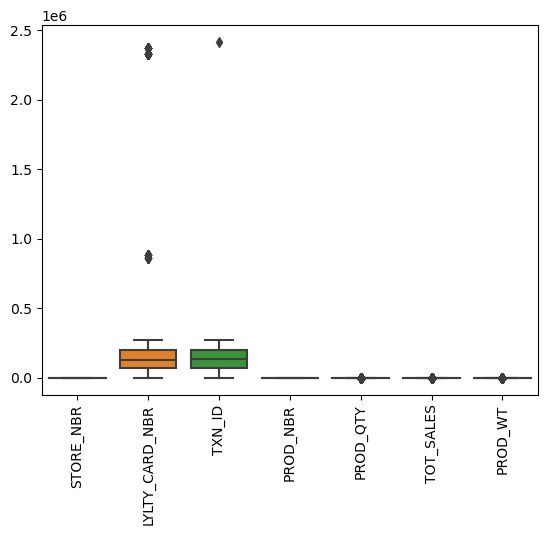

In [22]:
sns.boxplot(data = df_td)
plt.xticks(rotation =90)
plt.show()

PROD_QTY


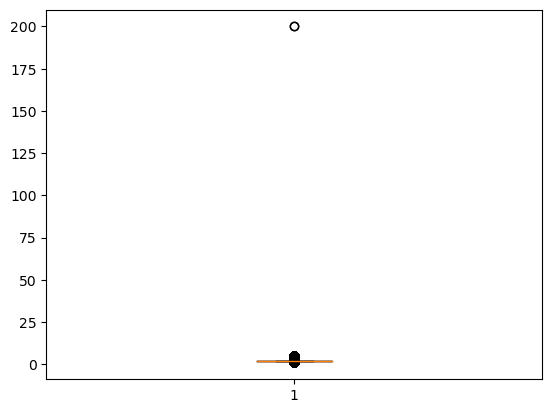

TOT_SALES


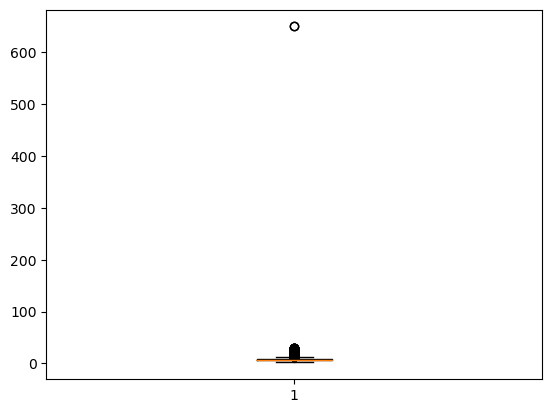

PROD_WT


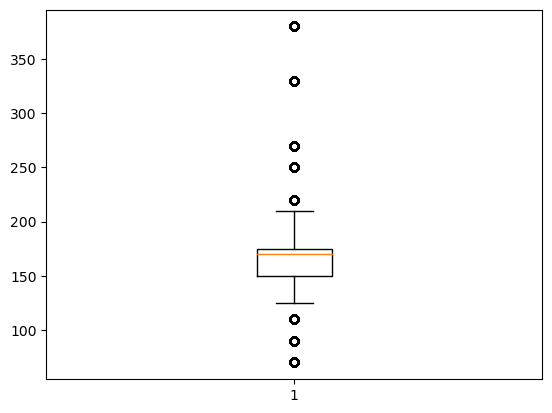

In [23]:
col = ["PROD_QTY", "TOT_SALES" , "PROD_WT"]   
for i in col:
    print(i)
    plt.boxplot(df_td[i])
    plt.show()

In [24]:
df = pd.merge(df_td,df_pb, on="LYLTY_CARD_NBR", how='left')

TOT_SALES


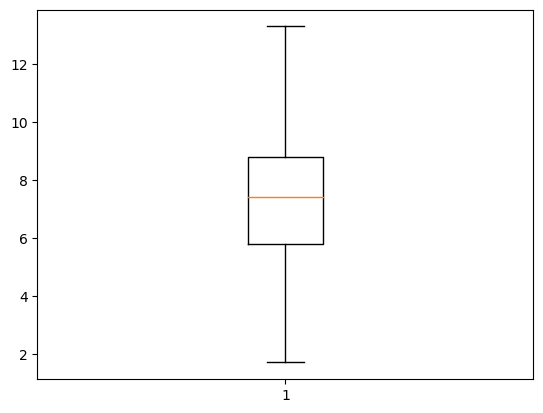

PROD_WT


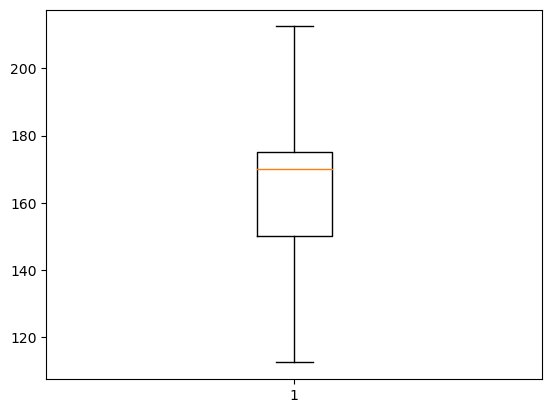

In [25]:
col =["TOT_SALES","PROD_WT"]
for i in col:
    Q1 = df[i].quantile(.25)
    Q3 = df[i].quantile(.75)
    IQR = Q3 - Q1
    upper_limit = Q3 +(1.5*IQR)
    lower_limit = Q1 -(1.5*IQR)
    
    df[i] = df[i].apply(lambda x: upper_limit if x > upper_limit else (lower_limit if x < lower_limit else x))

    
    print(i)
    plt.boxplot(df[i])
    plt.show()

In [26]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_WT,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175.0,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170.0,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/CreamOnion,5,13.3,175.0,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili,3,13.3,150.0,MIDAGE SINGLES/COUPLES,Budget


In [27]:
df.to_csv("mergeddf.csv")

### Data Cleaning Completed

### Exploratory Data Analysis

#### Demographic Analysis

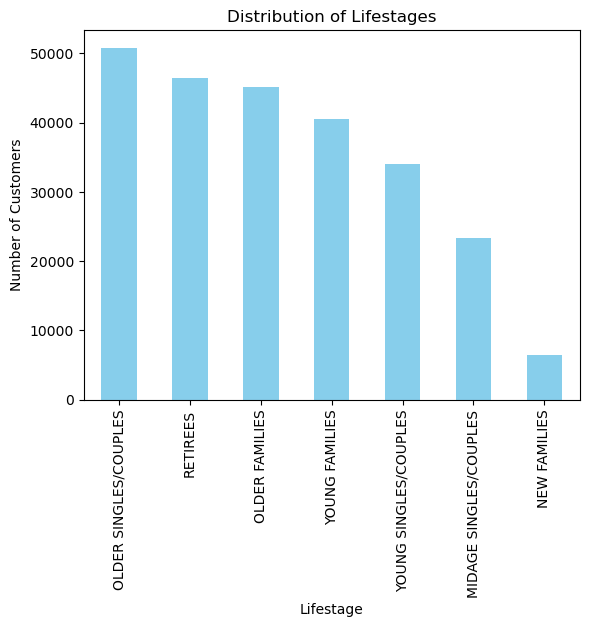

In [28]:
lifestage_count = df['LIFESTAGE'].value_counts()
lifestage_count.plot(kind='bar', color='skyblue')
plt.title('Distribution of Lifestages')
plt.xlabel('Lifestage')
plt.ylabel('Number of Customers')
plt.show()

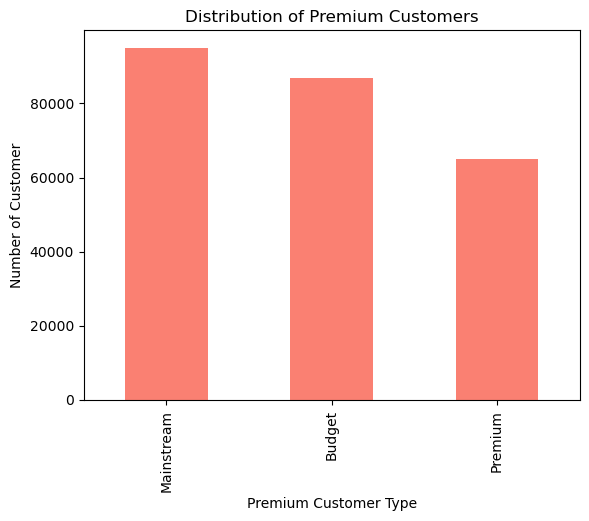

In [29]:
premium_customer = df['PREMIUM_CUSTOMER'].value_counts()
premium_customer.plot(kind='bar', color='salmon')
plt.title("Distribution of Premium Customers")
plt.ylabel("Number of Customer")
plt.xlabel("Premium Customer Type")
plt.show()

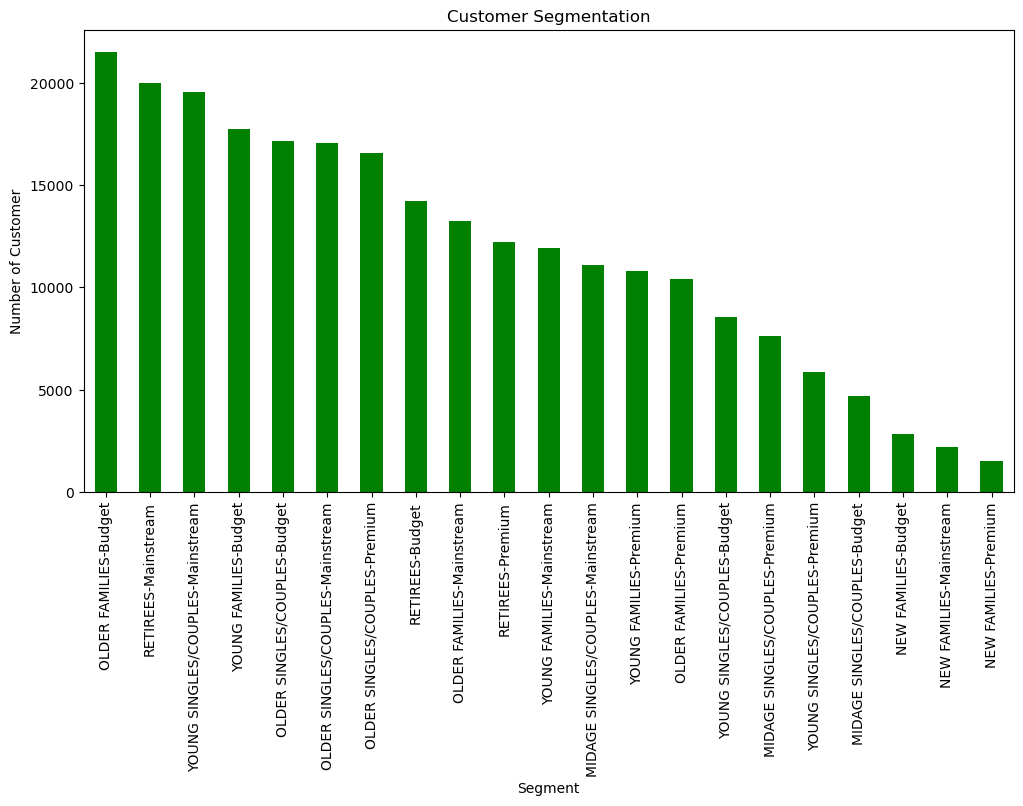

In [30]:
df1 =df.copy()

df1['Segment'] = df['LIFESTAGE']+ "-" + df['PREMIUM_CUSTOMER']
plt.figure(figsize=(12,6))
segment_count = df1['Segment'].value_counts()
segment_count.plot(kind='bar', color='green')
plt.title('Customer Segmentation')
plt.xlabel("Segment")
plt.ylabel("Number of Customer")
plt.show()

#### Product Analysis

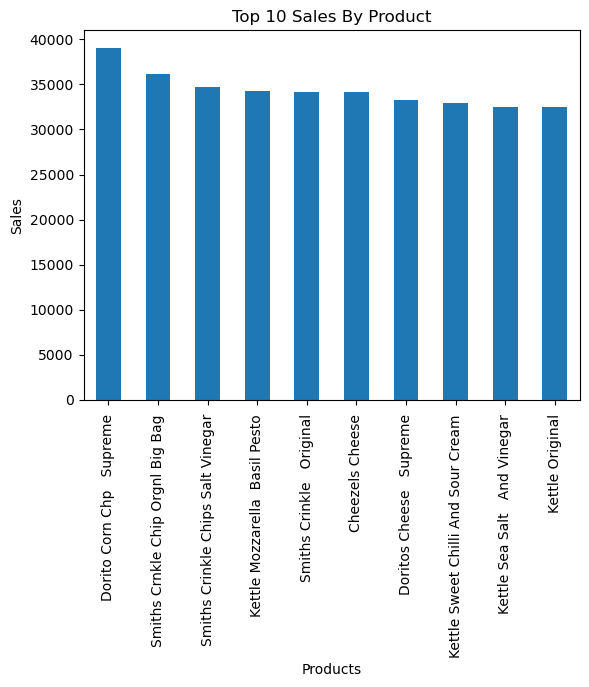

In [31]:
sales_product = df1.groupby('PROD_NAME')['TOT_SALES'].sum().sort_values(ascending=False).head(10)
sales_product.plot(kind='bar')
plt.title("Top 10 Sales By Product")
plt.xlabel("Products")
plt.ylabel("Sales")
plt.show()

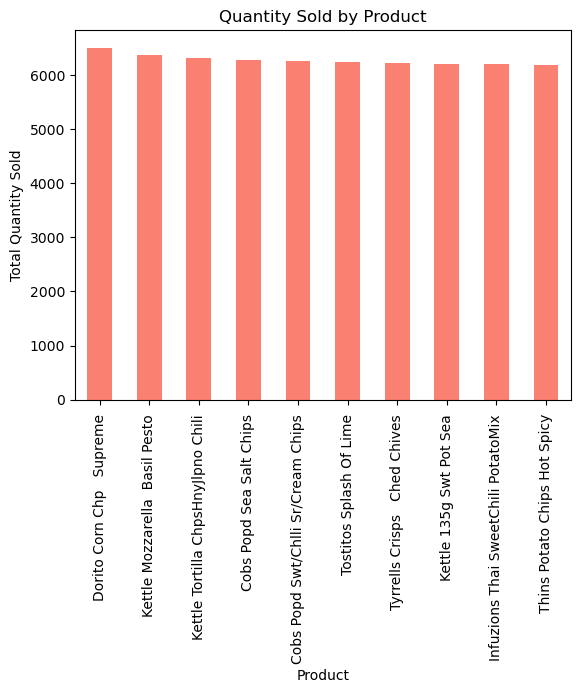

In [32]:
quantity_by_product = df.groupby('PROD_NAME')['PROD_QTY'].sum().sort_values(ascending=False).head(10)
quantity_by_product.plot(kind='bar', color='salmon')
plt.title('Quantity Sold by Product')
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.show()

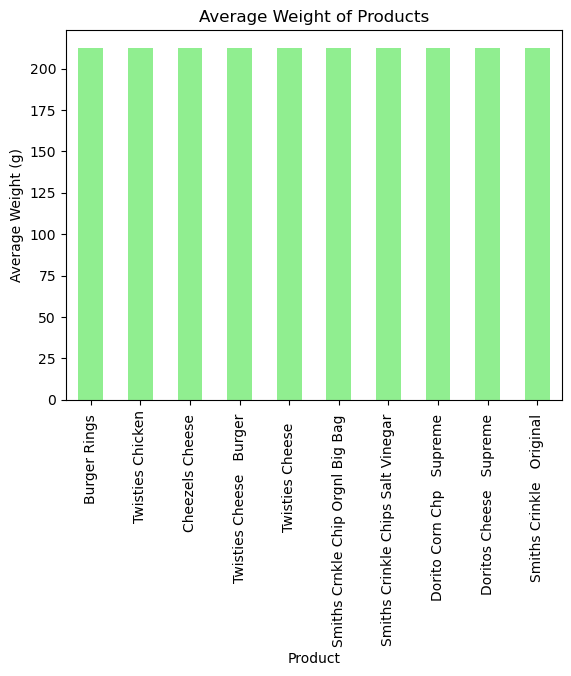

In [33]:
weight_by_product = df.groupby('PROD_NAME')['PROD_WT'].mean().sort_values(ascending=False).head(10)
weight_by_product.plot(kind='bar', color='lightgreen')
plt.title('Average Weight of Products')
plt.xlabel('Product')
plt.ylabel('Average Weight (g)')
plt.show()


#### Purchasing Behaviour

In [34]:
date_df =df1.copy()
date_df['Month']=date_df['DATE'].dt.month_name()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 
               'October', 'November', 'December']


In [35]:
date_df['Month']= pd.Categorical(date_df['Month'], categories=month_order, ordered=True)

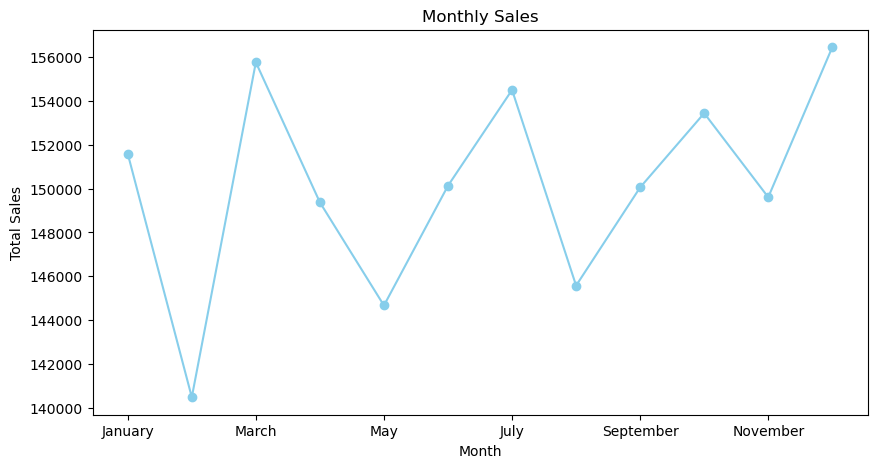

In [36]:
monthly_sales =  date_df.groupby('Month')['TOT_SALES'].sum()
plt.figure(figsize=(10,5))
monthly_sales.plot(color ="skyblue", marker="o")
plt.ylabel("Total Sales")
plt.title("Monthly Sales")
plt.show()

Total sales peaked on December followed by March and July , indicating a significant month for transactions.

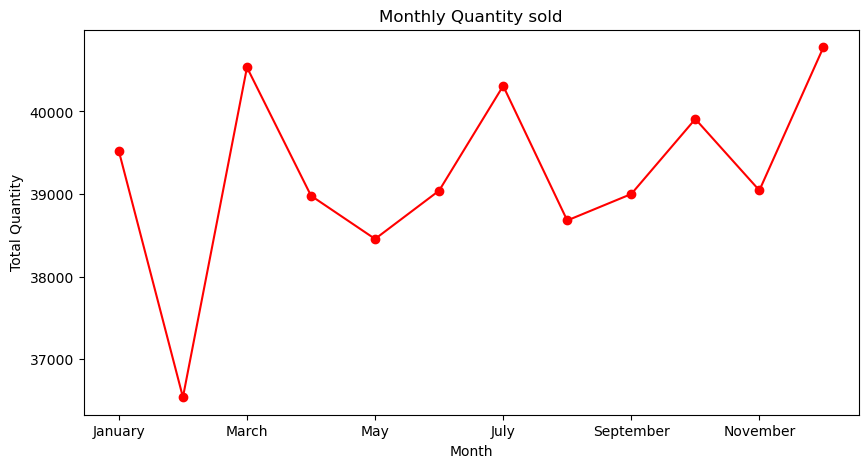

In [37]:
monthly_QTY =  date_df.groupby('Month')['PROD_QTY'].sum()
plt.figure(figsize=(10,5))
monthly_QTY.plot(color ="red", marker="o")
plt.ylabel("Total Quantity")
plt.title("Monthly Quantity sold")
plt.show()

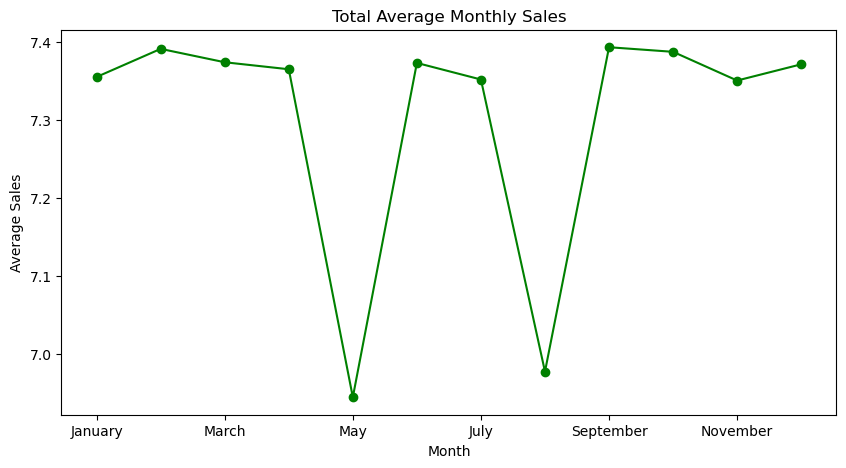

In [38]:
avg_monthly_sales =  date_df.groupby('Month')['TOT_SALES'].mean()
plt.figure(figsize=(10,5))
avg_monthly_sales.plot(color ="g", marker="o")
plt.ylabel("Average Sales")
plt.title("Total Average Monthly Sales")
plt.show()

Average transaction size remained relatively consistent  Except in the month of may and August.

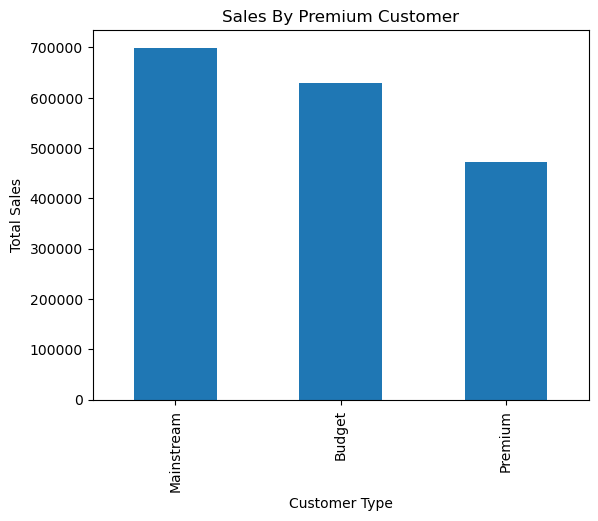

In [39]:
Sales_by_Customer = df.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum().sort_values(ascending = False).head(10)
Sales_by_Customer.plot(kind= 'bar')
plt.title("Sales By Premium Customer")
plt.xlabel("Customer Type")
plt.ylabel("Total Sales")
plt.show()

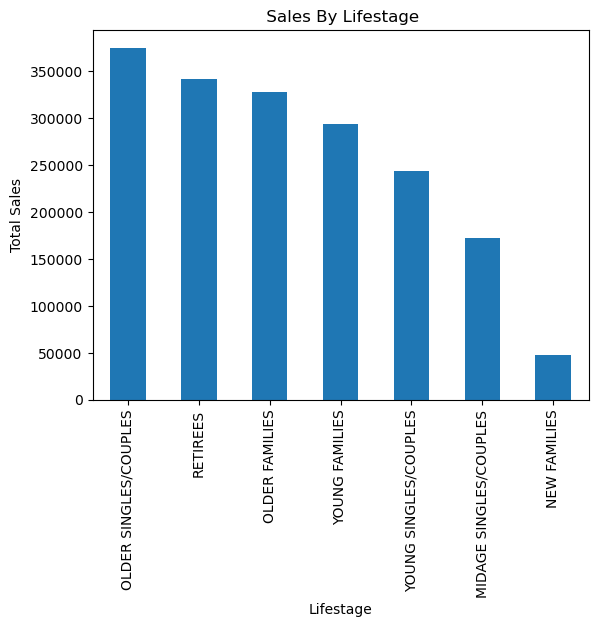

In [40]:
lifestage = df.groupby('LIFESTAGE')['TOT_SALES'].sum().sort_values(ascending = False)
lifestage.plot(kind= 'bar')
plt.title(" Sales By Lifestage")
plt.xlabel("Lifestage")
plt.ylabel("Total Sales")
plt.show()

#### Correlation Analysis

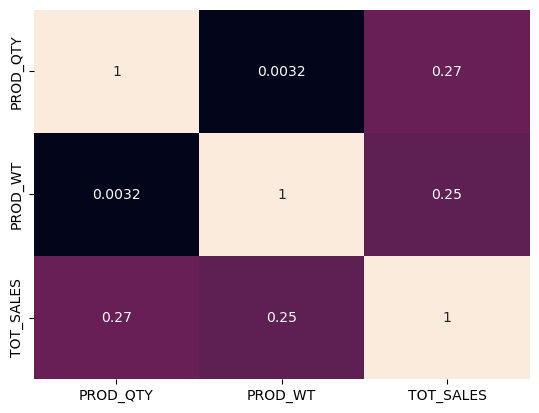

In [41]:
correlation_matrix=df[['PROD_QTY', 'PROD_WT', 'TOT_SALES']].corr()
sns.heatmap(correlation_matrix,annot=True, cbar=False)
plt.show()

### Insight: